In [21]:
import numpy as np
data=np.load('/home/minkyukim/sam-tinyViT/feature_output/ivdm_default/layer_3_output.npy')
print(data.shape)

#/home/minkyukim/sam-tinyViT/work_dir/MedSAM/lite_medsam.pth, /mnt/sda/minkyukim/pth/tiny-brats/tiny_model_1.pth
#/home/minkyukim/sam-tinyViT/work_dir/MedSAM/lite_medsam.pth, 
#/home/minkyukim/sam-tinyViT/work_dir/MedSAM/lite_medsam.pth, /mnt/sda/minkyukim/pth/tiny-ivdm/tiny_model_best.pth
#/home/minkyukim/sam-tinyViT/work_dir/MedSAM/lite_medsam.pth, /mnt/sda/minkyukim/pth/tiny-ivdm-distill/tiny_model_20.pth

(1, 320, 64, 64)


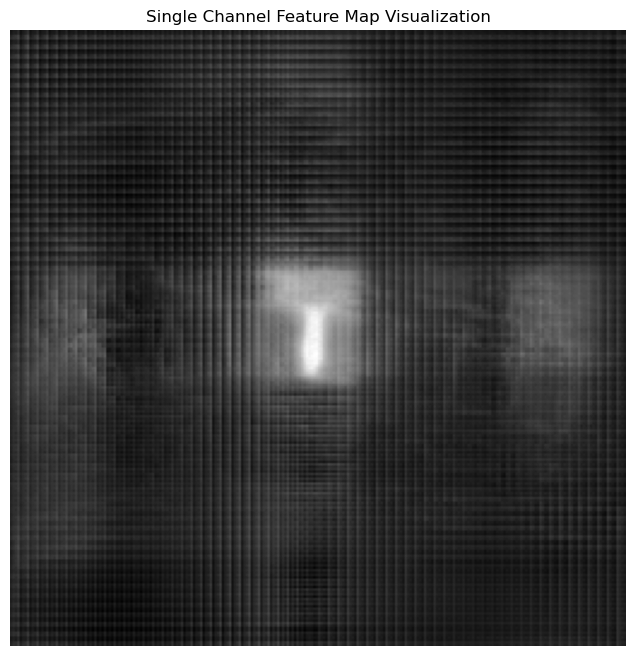

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
out=np.load('/home/minkyukim/sam-tinyViT/feature_output/ivdm_vanilla_after/mask_output.npy')

# Reshape and visualize without PCA
feature_map = out[0, 0]  # Shape: [256, 256] (single channel)

# Normalize to [0, 1] for visualization
feature_map_normalized = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

# Plot the single channel feature map
plt.figure(figsize=(8, 8))
plt.imshow(feature_map_normalized, cmap='gray')
plt.axis('off')
plt.title('Single Channel Feature Map Visualization')
plt.show()

Text(0.5, 1.0, 'PCA visualization of the feature map')

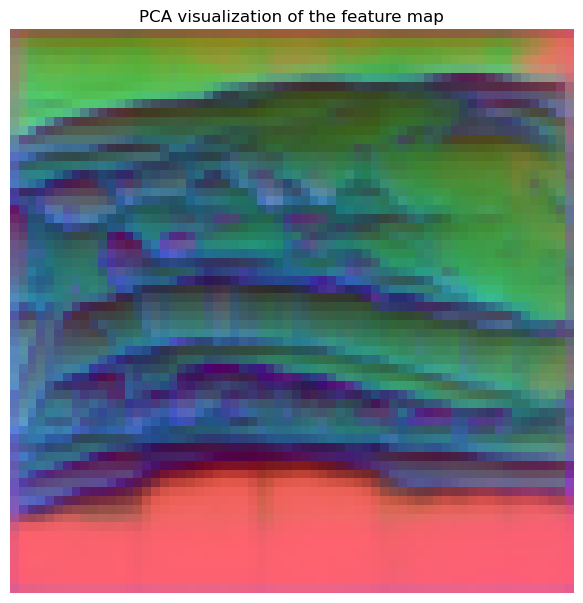

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Assuming 'out' is your encoder output with shape [1, 256, 64, 64]
# Extract the feature map and reshape it
out=np.load('/home/minkyukim/sam-tinyViT/feature_output/ivdm_distill_after/01-15_fat.npy_student_output.npy')
# out=out.transpose(0, 3, 1, 2)
feature_map = out[0]  # Shape: [256, 64, 64]
feature_map_reshaped = feature_map.reshape(256, -1).T  # Shape: [4096, 256]
# Apply PCA
pca = PCA(n_components=3)
feature_map_pca = pca.fit_transform(feature_map_reshaped)
# Reshape back to image dimensions
feature_map_pca = feature_map_pca.reshape(64, 64, 3)
# Normalize to [0, 1] for visualization
feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())
# Plot the PCA visualization
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(feature_map_pca_normalized, cmap='jet')
plt.axis('off')
plt.title('PCA visualization of the feature map')
# plt.subplot(1, 2, 2)
# plt.imshow(feature_map_pca_normalized, cmap='jet')
# plt.axis('off')
# plt.title('PCA visualization of the feature map')
# plt.savefig('input_image.png', bbox_inches='tight', pad_inches=0)

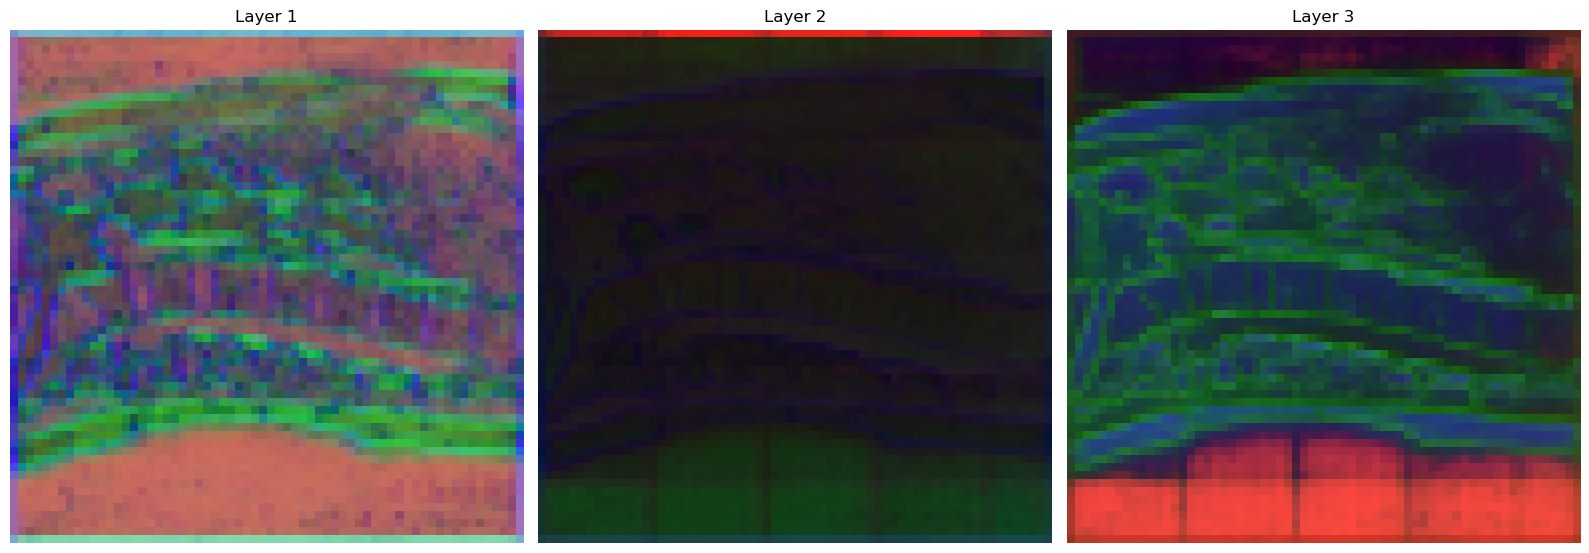

PCA 시각화가 완료되었습니다.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

output_dir = '/home/minkyukim/sam-tinyViT/feature_output/ivdm_distill_after'

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

layer_files = ['student_layer_1_output.npy', 'student_layer_2_output.npy', 'student_layer_3_output.npy']
layer_channels = [160, 320, 320] 

for i, file_name in enumerate(layer_files):

    file_path = os.path.join(output_dir, file_name)

    out = np.load(file_path)


    feature_map = out[0] 

    feature_map_reshaped = feature_map.reshape(layer_channels[i], -1).T

    pca = PCA(n_components=3)
    feature_map_pca = pca.fit_transform(feature_map_reshaped)

    feature_map_pca = feature_map_pca.reshape(64, 64, 3)

    feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())

    axes[i].imshow(feature_map_pca_normalized, cmap='jet')
    axes[i].axis('off')
    axes[i].set_title(f'Layer {i + 1}')

plt.tight_layout()
plt.show()

print("PCA 시각화가 완료되었습니다.")


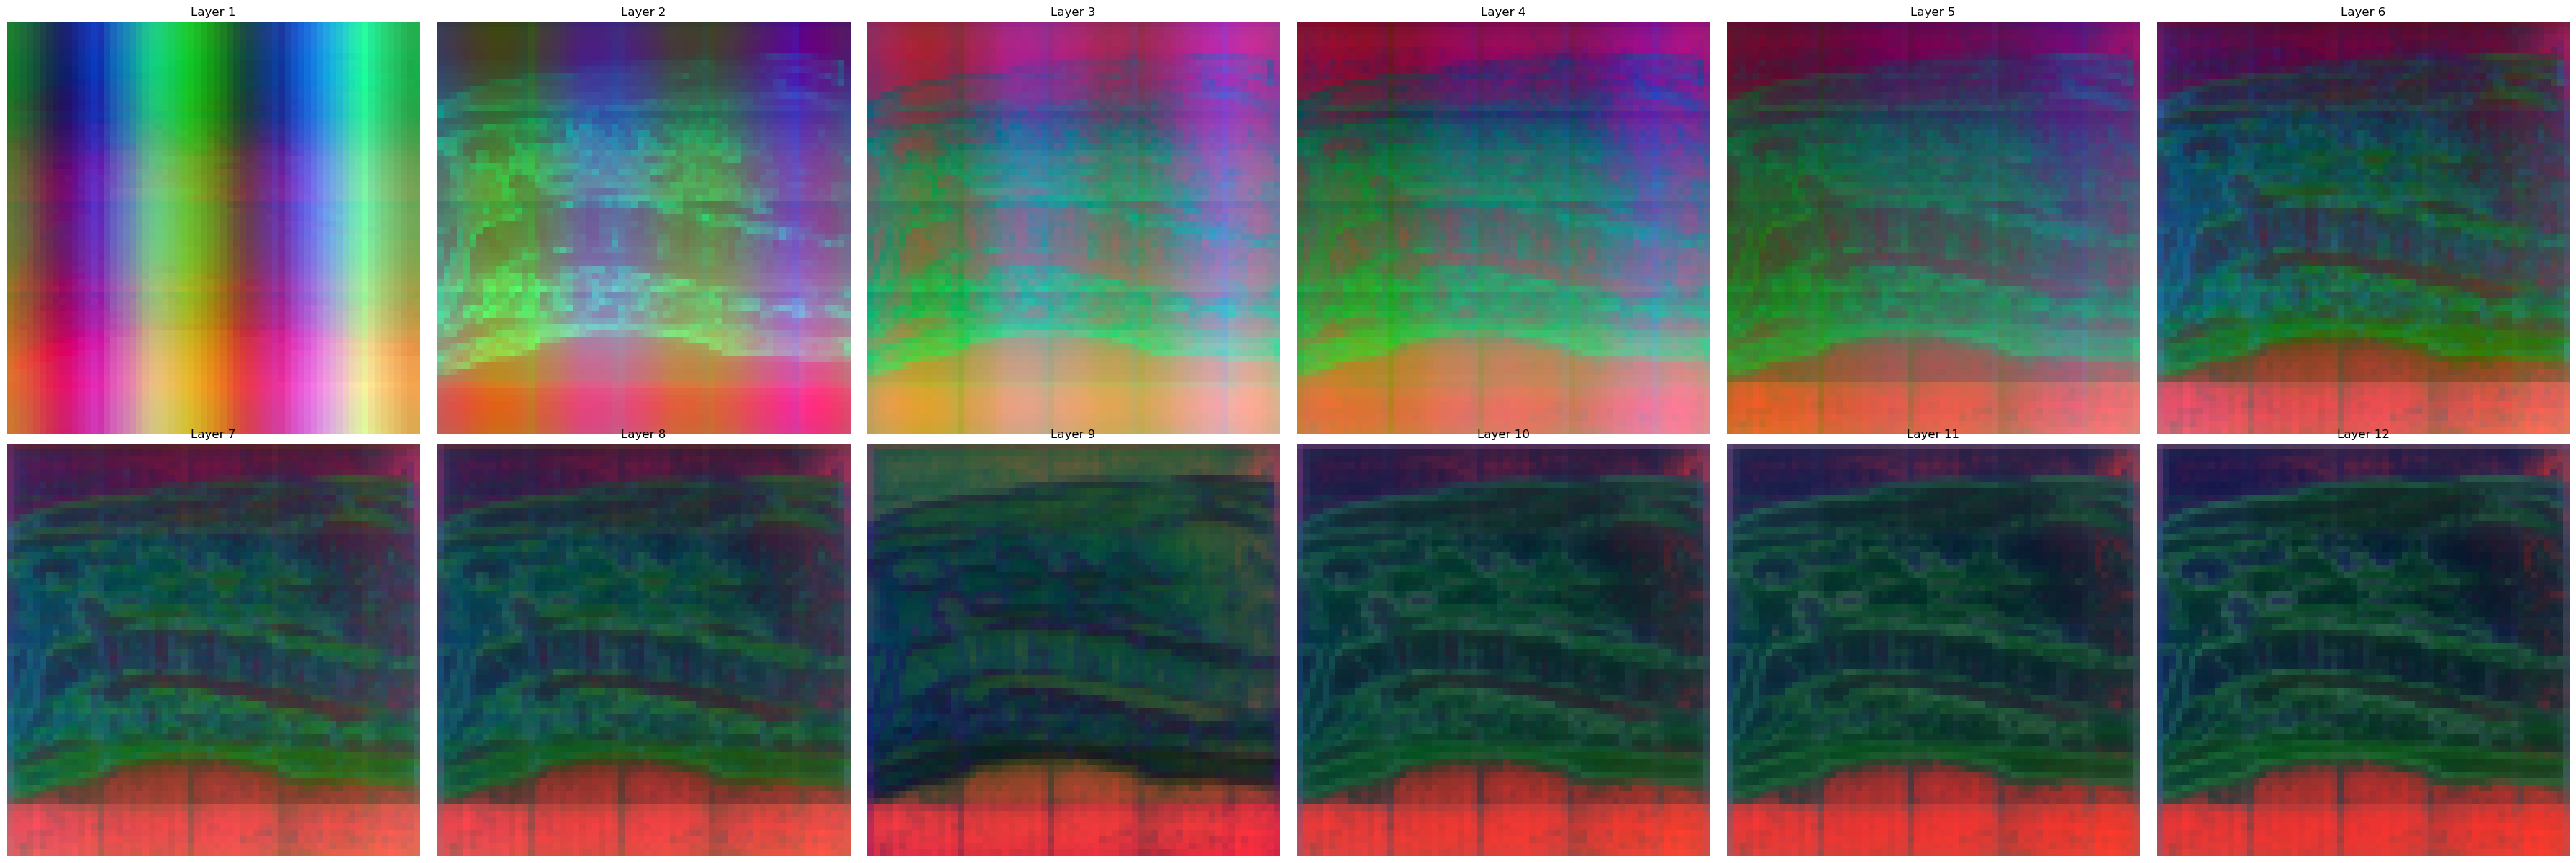

PCA 시각화가 모두 완료되었습니다.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

output_dir = '/home/minkyukim/sam-tinyViT/feature_output/ivdm_distill_before'

fig, axes = plt.subplots(2, 6, figsize=(36, 12))

for number in range(1, 13):

    file_path = os.path.join(output_dir, f'layer_{number}_output.npy')

    out = np.load(file_path)

    out = out.transpose(0, 3, 1, 2)

    feature_map = out[0]

    feature_map_reshaped = feature_map.reshape(768, -1).T

    pca = PCA(n_components=3)
    feature_map_pca = pca.fit_transform(feature_map_reshaped)

    feature_map_pca = feature_map_pca.reshape(64, 64, 3)

    feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())

    row = (number - 1) // 6
    col = (number - 1) % 6
    axes[row, col].imshow(feature_map_pca_normalized, cmap='jet')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {number}')

plt.tight_layout()
plt.show()

print("PCA 시각화가 모두 완료되었습니다.")